In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

The aim is to model the iterative prisoner's dillemma with different strategies and plot the points of each player. Possible strategies:
1. always cooperate
2. always cheat
3. tit for tat (doing what the opponent just did)
4. random (50/50)
5. grudger: cooperate until the opponent cheats. If the opponent cheats even once, start to always cheat
6. money maker: if I have more than -150 (or 50 in "the more points, the better" model), cooperate. Otherwise, cheat.
7. progressive tax: the probability to cooperate is proportional to my relative well-being.
8. ...

Something to read: Axelrod's tournament, Nowak's works


In [169]:
iterations = 100
cost_matrix = {('c', 'c'): (-1, -1), ('d', 'd'): (-2, -2), ('c', 'd'): (-3, 0), ('d', 'c'): (0, -3)}

In [193]:
class game():
    def __init__(self, cost_matrix, iterations, a_strategy, b_strategy):
        self.a_points = []
        self.b_points = []
        self.iterations = iterations
        self.current_iter = 0
        self.a_strategy = a_strategy
        self.b_strategy = b_strategy
        self.cost_matrix = cost_matrix
        self.a_story = []
        self.b_story = []
        
    def play(self):
        a_current, b_current = sum(self.a_points), sum(self.b_points)
        a_move = self.decide(self.a_strategy, self.b_story, a_current, b_current)
        b_move = self.decide(self.b_strategy, self.a_story, b_current, a_current)
        self.a_story.append(a_move)
        self.b_story.append(b_move)
        return self.cost_matrix[(a_move, b_move)]
    
    def decide(self, strategy, opponent_story, my_points, opponent_points):
        if strategy == 'always cooperate':
            return 'c'
        elif strategy == 'always cheat':
            return 'd'
        elif strategy == 'tit for tat':
            if self.current_iter == 0:
                return 'c'
            else:
                return opponent_story[-1]
        elif strategy == 'random':
            if np.random.rand(1)[0] > 0.5:
                return 'c'
            else:
                return 'd'
        elif strategy == 'grudger':
            if self.current_iter == 0:
                return 'c'
            elif 'd' in opponent_story:
                return 'd'
            else:
                return 'c'
        elif strategy == 'money maker':
            if my_points > -150:
                return 'c'
            else:
                return 'd'
        elif strategy == 'progressive tax':
            prob_to_c = np.tanh(my_points - opponent_points)/2 + 0.5
            probs = [prob_to_c, 1 - prob_to_c]
            return np.random.choice(['c', 'd'], 1, p=probs)[0]
            
    def play_tournament(self):
        for i in range(self.iterations):
            self.current_iter = i
            a, b = self.play()
            self.a_points.append(a)
            self.b_points.append(b)
        return self.a_points, self.b_points

In [254]:
a_strategy = 'progressive tax'
b_strategy = 'random'

In [255]:
my_game = game(cost_matrix, iterations, a_strategy, b_strategy)
a_points, b_points = my_game.play_tournament()

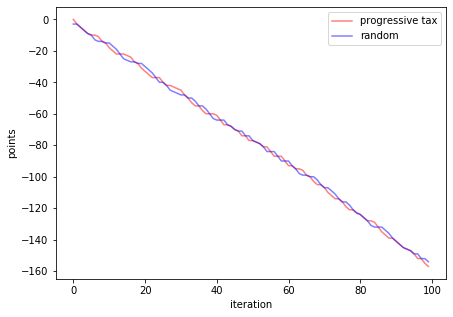

In [256]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(np.cumsum(a_points), color='red', label=a_strategy, alpha=0.5)
plt.plot(np.cumsum(b_points), color='blue', label=b_strategy, alpha=0.5)
ax.set_xlabel('iteration')
ax.set_ylabel('points')
plt.legend()
plt.savefig(f'pictures/{a_strategy}_vs_{b_strategy}.png',  bbox_inches='tight', format='png')
plt.show()

## Let's change the cost matrix 

In [164]:
cost_matrix = {('c', 'c'): (2, 2), ('d', 'd'): (0, 0), ('c', 'd'): (-1, 3), ('d', 'c'): (3, -1)}

Here the more points, the better which is more intuitive.

In [165]:
a_strategy = 'progressive tax'
b_strategy = 'random'

In [166]:
my_game = game(cost_matrix, iterations, a_strategy, b_strategy)
a_points, b_points = my_game.play_tournament()

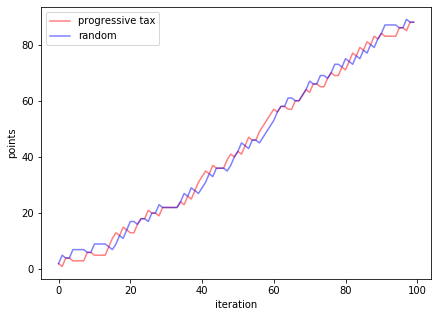

In [167]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(np.cumsum(a_points), color='red', label=a_strategy, alpha=0.5)
plt.plot(np.cumsum(b_points), color='blue', label=b_strategy, alpha=0.5)
ax.set_xlabel('iteration')
ax.set_ylabel('points')
plt.legend()
plt.savefig(f'pictures/{a_strategy}_vs_{b_strategy}_positive_cost.png',  bbox_inches='tight', format='png')
plt.show()